##Challenge1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from __future__ import division
import csv
from datetime import datetime
from collections import Counter
import collections
import pandas as pd

!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_150530.txt


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 23.9M    0 23.9M    0     0  6082k      0 --:--:--  0:00:04 --:--:-- 6083k


In [2]:
with open('turnstile_150530.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]
    print rows[0]

['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS']


In [3]:
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS']

In [4]:
print rows[0]

['A002', 'R051', '02-00-00', 'LEXINGTON AVE', 'NQR456', 'BMT', '05/23/2015', '00:00:00', 'REGULAR', '0005149653', '0001743036']


In [6]:
raw_readings = {} 
for row in rows:
    raw_readings.setdefault(tuple(row[:4]), []).append((row[4:])) 
raw_readings.items()[0]    

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
 [['NR',
   'BMT',
   '05/23/2015',
   '00:00:00',
   'REGULAR',
   '0005882595',
   '0003277214'],
  ['NR',
   'BMT',
   '05/23/2015',
   '04:00:00',
   'REGULAR',
   '0005882651',
   '0003277226'],
  ['NR',
   'BMT',
   '05/23/2015',
   '08:00:00',
   'REGULAR',
   '0005882677',
   '0003277246'],
  ['NR',
   'BMT',
   '05/23/2015',
   '12:00:00',
   'REGULAR',
   '0005882778',
   '0003277363'],
  ['NR',
   'BMT',
   '05/23/2015',
   '16:00:00',
   'REGULAR',
   '0005882992',
   '0003277561'],
  ['NR',
   'BMT',
   '05/23/2015',
   '20:00:00',
   'REGULAR',
   '0005883236',
   '0003277804'],
  ['NR',
   'BMT',
   '05/24/2015',
   '00:00:00',
   'REGULAR',
   '0005883410',
   '0003277876'],
  ['NR',
   'BMT',
   '05/24/2015',
   '04:00:00',
   'REGULAR',
   '0005883463',
   '0003277888'],
  ['NR',
   'BMT',
   '05/24/2015',
   '08:00:00',
   'REGULAR',
   '0005883490',
   '0003277905'],
  ['NR',
   'BMT',
   '05/24/2015',
   '12:00:00',
   

##Challenge 2

In [7]:
datetime_cumulative = {turnstile: [(datetime.strptime(date + time,
                                                      '%m/%d/%Y%X'),
                                    int(in_cumulative))
                                   for _, _, date, time,
                                       _, in_cumulative, _ in rows]
                       for turnstile, rows in raw_readings.items()} #why we need others _? also .items?

In [8]:
datetime_cumulative.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
 [(datetime.datetime(2015, 5, 23, 0, 0), 5882595),
  (datetime.datetime(2015, 5, 23, 4, 0), 5882651),
  (datetime.datetime(2015, 5, 23, 8, 0), 5882677),
  (datetime.datetime(2015, 5, 23, 12, 0), 5882778),
  (datetime.datetime(2015, 5, 23, 16, 0), 5882992),
  (datetime.datetime(2015, 5, 23, 20, 0), 5883236),
  (datetime.datetime(2015, 5, 24, 0, 0), 5883410),
  (datetime.datetime(2015, 5, 24, 4, 0), 5883463),
  (datetime.datetime(2015, 5, 24, 8, 0), 5883490),
  (datetime.datetime(2015, 5, 24, 12, 0), 5883560),
  (datetime.datetime(2015, 5, 24, 16, 0), 5883742),
  (datetime.datetime(2015, 5, 24, 20, 0), 5883969),
  (datetime.datetime(2015, 5, 25, 0, 0), 5884110),
  (datetime.datetime(2015, 5, 25, 4, 0), 5884128),
  (datetime.datetime(2015, 5, 25, 8, 0), 5884146),
  (datetime.datetime(2015, 5, 25, 12, 0), 5884219),
  (datetime.datetime(2015, 5, 25, 16, 0), 5884363),
  (datetime.datetime(2015, 5, 25, 20, 0), 5884586),
  (datetime.datetime(2015, 

In [9]:
datetime_count_times = {turnstile: [[rows[i][0],
                                     rows[i+1][1] - rows[i][1]]
                                    for i in range(len(rows) - 1)]
                        for turnstile, rows in datetime_cumulative.items()}

In [10]:
datetime_count_times.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
 [[datetime.datetime(2015, 5, 23, 0, 0), 56],
  [datetime.datetime(2015, 5, 23, 4, 0), 26],
  [datetime.datetime(2015, 5, 23, 8, 0), 101],
  [datetime.datetime(2015, 5, 23, 12, 0), 214],
  [datetime.datetime(2015, 5, 23, 16, 0), 244],
  [datetime.datetime(2015, 5, 23, 20, 0), 174],
  [datetime.datetime(2015, 5, 24, 0, 0), 53],
  [datetime.datetime(2015, 5, 24, 4, 0), 27],
  [datetime.datetime(2015, 5, 24, 8, 0), 70],
  [datetime.datetime(2015, 5, 24, 12, 0), 182],
  [datetime.datetime(2015, 5, 24, 16, 0), 227],
  [datetime.datetime(2015, 5, 24, 20, 0), 141],
  [datetime.datetime(2015, 5, 25, 0, 0), 18],
  [datetime.datetime(2015, 5, 25, 4, 0), 18],
  [datetime.datetime(2015, 5, 25, 8, 0), 73],
  [datetime.datetime(2015, 5, 25, 12, 0), 144],
  [datetime.datetime(2015, 5, 25, 16, 0), 223],
  [datetime.datetime(2015, 5, 25, 20, 0), 138],
  [datetime.datetime(2015, 5, 26, 0, 0), 17],
  [datetime.datetime(2015, 5, 26, 4, 0), 103],
  [datetime.da

##Challenge 3

In [12]:
day_counts={}
for turnstile, rows in datetime_count_times.items():
    by_day = {}
    for time, count in rows:
        day = time.date()
        by_day[day] = by_day.get(day, 0) + count
    day_counts[turnstile] = sorted(by_day.items())

In [14]:
day_counts.items()[0]

(('A030', 'R083', '01-06-00', '23 ST-5 AVE'),
 [(datetime.date(2015, 5, 23), 815),
  (datetime.date(2015, 5, 24), 700),
  (datetime.date(2015, 5, 25), 614),
  (datetime.date(2015, 5, 26), 2395),
  (datetime.date(2015, 5, 27), 2723),
  (datetime.date(2015, 5, 28), 2543),
  (datetime.date(2015, 5, 29), 2123)])

In [15]:
ordered_day_counts = collections.OrderedDict(sorted(day_counts.items()))
ordered_day_counts.items()[:12]

[(('A002', 'R051', '02-00-00', 'LEXINGTON AVE'),
  [(datetime.date(2015, 5, 23), 1087),
   (datetime.date(2015, 5, 24), 732),
   (datetime.date(2015, 5, 25), 854),
   (datetime.date(2015, 5, 26), 1831),
   (datetime.date(2015, 5, 27), 1817),
   (datetime.date(2015, 5, 28), 1823),
   (datetime.date(2015, 5, 29), 1584)]),
 (('A002', 'R051', '02-00-01', 'LEXINGTON AVE'),
  [(datetime.date(2015, 5, 23), 933),
   (datetime.date(2015, 5, 24), 693),
   (datetime.date(2015, 5, 25), 672),
   (datetime.date(2015, 5, 26), 1482),
   (datetime.date(2015, 5, 27), 1602),
   (datetime.date(2015, 5, 28), 1523),
   (datetime.date(2015, 5, 29), 1358)]),
 (('A002', 'R051', '02-03-00', 'LEXINGTON AVE'),
  [(datetime.date(2015, 5, 23), 382),
   (datetime.date(2015, 5, 24), 450),
   (datetime.date(2015, 5, 25), 408),
   (datetime.date(2015, 5, 26), 625),
   (datetime.date(2015, 5, 27), 644),
   (datetime.date(2015, 5, 28), 649),
   (datetime.date(2015, 5, 29), 564)]),
 (('A002', 'R051', '02-03-01', 'LEXINGTO

##Challenge 4

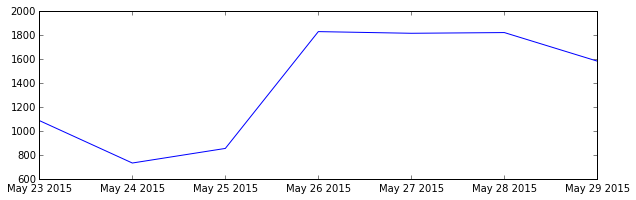

In [17]:
dates = []
counts = []
for row in ordered_day_counts[('A002', 'R051', '02-00-00', 'LEXINGTON AVE')] :
    dates.append(row[0])
    counts.append(row[1])

plt.figure(figsize=(10,3)) 
plt.plot(dates,counts)

##Challenge 5

In [19]:
df = pd.DataFrame.from_dict(ordered_day_counts, orient="index")
df = df.reset_index(drop=False)

In [20]:
df.head()

,index,0,1,2,3,4,5,6
0,"(A002, R051, 02-00-00, LEXINGTON AVE)","(2015-05-23, 1087)","(2015-05-24, 732)","(2015-05-25, 854)","(2015-05-26, 1831)","(2015-05-27, 1817)","(2015-05-28, 1823)","(2015-05-29, 1584)"
1,"(A002, R051, 02-00-01, LEXINGTON AVE)","(2015-05-23, 933)","(2015-05-24, 693)","(2015-05-25, 672)","(2015-05-26, 1482)","(2015-05-27, 1602)","(2015-05-28, 1523)","(2015-05-29, 1358)"
2,"(A002, R051, 02-03-00, LEXINGTON AVE)","(2015-05-23, 382)","(2015-05-24, 450)","(2015-05-25, 408)","(2015-05-26, 625)","(2015-05-27, 644)","(2015-05-28, 649)","(2015-05-29, 564)"
3,"(A002, R051, 02-03-01, LEXINGTON AVE)","(2015-05-23, 1424)","(2015-05-24, 1056)","(2015-05-25, 1101)","(2015-05-26, 1400)","(2015-05-27, 1441)","(2015-05-28, 1493)","(2015-05-29, 1234)"
4,"(A002, R051, 02-03-02, LEXINGTON AVE)","(2015-05-23, 1180)","(2015-05-24, 986)","(2015-05-25, 838)","(2015-05-26, 1428)","(2015-05-27, 1422)","(2015-05-28, 1465)","(2015-05-29, 1204)"


In [21]:
df.columns = ['Turnstile', 'Day1Count1', 'Day2Count2', 'Day3Count3', 'Day4Count4', 'Day5Count5', 'Day6Count6', 'Day7Count7']

In [22]:
df.head()

,Turnstile,Day1Count1,Day2Count2,Day3Count3,Day4Count4,Day5Count5,Day6Count6,Day7Count7
0,"(A002, R051, 02-00-00, LEXINGTON AVE)","(2015-05-23, 1087)","(2015-05-24, 732)","(2015-05-25, 854)","(2015-05-26, 1831)","(2015-05-27, 1817)","(2015-05-28, 1823)","(2015-05-29, 1584)"
1,"(A002, R051, 02-00-01, LEXINGTON AVE)","(2015-05-23, 933)","(2015-05-24, 693)","(2015-05-25, 672)","(2015-05-26, 1482)","(2015-05-27, 1602)","(2015-05-28, 1523)","(2015-05-29, 1358)"
2,"(A002, R051, 02-03-00, LEXINGTON AVE)","(2015-05-23, 382)","(2015-05-24, 450)","(2015-05-25, 408)","(2015-05-26, 625)","(2015-05-27, 644)","(2015-05-28, 649)","(2015-05-29, 564)"
3,"(A002, R051, 02-03-01, LEXINGTON AVE)","(2015-05-23, 1424)","(2015-05-24, 1056)","(2015-05-25, 1101)","(2015-05-26, 1400)","(2015-05-27, 1441)","(2015-05-28, 1493)","(2015-05-29, 1234)"
4,"(A002, R051, 02-03-02, LEXINGTON AVE)","(2015-05-23, 1180)","(2015-05-24, 986)","(2015-05-25, 838)","(2015-05-26, 1428)","(2015-05-27, 1422)","(2015-05-28, 1465)","(2015-05-29, 1204)"


In [425]:
df.dtypes

Turnstile     object
Day1Count1    object
Day2Count2    object
Day3Count3    object
Day4Count4    object
Day5Count5    object
Day6Count6    object
Day7Count7    object
dtype: object

In [426]:
df['Turnstile']

0        (A002, R051, 02-00-00, LEXINGTON AVE)
1        (A002, R051, 02-00-01, LEXINGTON AVE)
2        (A002, R051, 02-03-00, LEXINGTON AVE)
3        (A002, R051, 02-03-01, LEXINGTON AVE)
4        (A002, R051, 02-03-02, LEXINGTON AVE)
5        (A002, R051, 02-03-03, LEXINGTON AVE)
6        (A002, R051, 02-03-04, LEXINGTON AVE)
7        (A002, R051, 02-03-05, LEXINGTON AVE)
8        (A002, R051, 02-03-06, LEXINGTON AVE)
9        (A002, R051, 02-05-00, LEXINGTON AVE)
10       (A002, R051, 02-05-01, LEXINGTON AVE)
11       (A002, R051, 02-06-00, LEXINGTON AVE)
12         (A006, R079, 00-00-00, 5 AVE-59 ST)
13         (A006, R079, 00-00-01, 5 AVE-59 ST)
14         (A006, R079, 00-00-02, 5 AVE-59 ST)
15         (A006, R079, 00-00-03, 5 AVE-59 ST)
16         (A006, R079, 00-00-04, 5 AVE-59 ST)
17         (A006, R079, 00-03-00, 5 AVE-59 ST)
18         (A006, R079, 00-03-01, 5 AVE-59 ST)
19         (A006, R079, 00-03-02, 5 AVE-59 ST)
20         (A007, R079, 01-05-00, 5 AVE-59 ST)
21         (A

In [27]:
print type(df.Turnstile.values[0])
print type(df.Day1Count1.values[0])
for i in range(4):
    print type(df.Turnstile.values[0][i])

<type 'tuple'>
<type 'tuple'>
<type 'str'>
<type 'str'>
<type 'str'>
<type 'str'>


In [28]:
df2 = pd.read_csv("turnstile_150530.txt")

In [29]:
df2.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,05/23/2015,00:00:00,REGULAR,5149653,1743036
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,05/23/2015,04:00:00,REGULAR,5149687,1743046
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,05/23/2015,08:00:00,REGULAR,5149708,1743066
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,05/23/2015,12:00:00,REGULAR,5149852,1743152
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,05/23/2015,16:00:00,REGULAR,5150097,1743229


In [30]:
group_list = ['STATION', 'LINENAME']
df2['clean_entries'] = df2['ENTRIES'] - df2.groupby(group_list)['ENTRIES'].shift(1)

In [31]:
df2

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,clean_entries
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,05/23/2015,00:00:00,REGULAR,5149653,1743036,NaN
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,05/23/2015,04:00:00,REGULAR,5149687,1743046,34
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,05/23/2015,08:00:00,REGULAR,5149708,1743066,21
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,05/23/2015,12:00:00,REGULAR,5149852,1743152,144
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,05/23/2015,16:00:00,REGULAR,5150097,1743229,245
5,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,05/23/2015,20:00:00,REGULAR,5150472,1743292,375
6,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,05/24/2015,00:00:00,REGULAR,5150740,1743319,268
7,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,05/24/2015,04:00:00,REGULAR,5150762,1743322,22
8,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,05/24/2015,08:00:00,REGULAR,5150783,1743332,21
9,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,05/24/2015,12:00:00,REGULAR,5150911,1743381,128


In [32]:
df_grouped = df2.groupby(['C/A','STATION','LINENAME','DATE'])['clean_entries'].sum()

#I know that we need to eliminate the negative entries - not sure how, yet.

df_grouped

C/A    STATION        LINENAME  DATE      
A002   LEXINGTON AVE  NQR456    05/23/2015        484289
                                05/24/2015          9661
                                05/25/2015          9092
                                05/26/2015         16876
                                05/27/2015         18386
                                05/28/2015         18319
                                05/29/2015         18611
A006   5 AVE-59 ST    NQR       05/23/2015      10982246
                                05/24/2015          8090
                                05/25/2015          8130
                                05/26/2015         14749
                                05/27/2015         15348
                                05/28/2015         15485
                                05/29/2015         15164
A007   5 AVE-59 ST    NQR       05/23/2015      -7668089
                                05/24/2015          4819
                                05/25/2015   

##Challenge 6

In [33]:
df_grouped2 = df2.groupby(['STATION','LINENAME','DATE'])['clean_entries'].sum()
df_grouped2

STATION          LINENAME  DATE      
1 AVE            L         05/23/2015   -944690235
                           05/24/2015        13775
                           05/25/2015        12505
                           05/26/2015        22049
                           05/27/2015        24283
                           05/28/2015        24618
                           05/29/2015    938207466
103 ST           1         05/23/2015     -3050089
                           05/24/2015         7933
                           05/25/2015         7473
                           05/26/2015        13354
                           05/27/2015        13670
                           05/28/2015        13602
                           05/29/2015        14307
                 6         05/23/2015      -932571
                           05/24/2015         4009
                           05/25/2015         4244
                           05/26/2015         8833
                           05/27/2015       

##Challenge 7

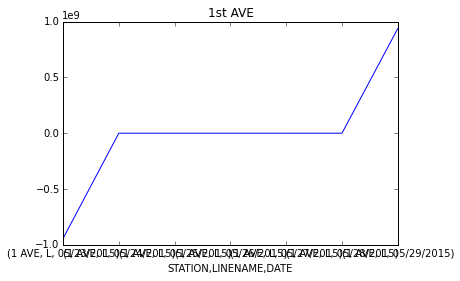

In [34]:
df_grouped2[:7].plot()
plt.title("1st AVE")

##Challenge 8

In [36]:
#Total entries per day

df_grouped3 = df2.groupby(['DATE'])['clean_entries'].sum()
df_grouped3 #negatives should be cleaned 

DATE
05/23/2015     -92604791
05/24/2015    -131157934
05/25/2015       2875439
05/26/2015       4053618
05/27/2015     -39881811
05/28/2015   -1819628977
05/29/2015     944186733
Name: clean_entries, dtype: float64

##Challenge 9

In [37]:
df_grouped4 = df2.groupby(['STATION','LINENAME'])['clean_entries'].sum()
df_grouped4.sort(ascending = False)
df_grouped4[:10] 

STATION          LINENAME
57 ST-7 AVE      NQR         1224286092
138 ST-GR CONC   45           988319297
42 ST-GRD CNTRL  4567S        855836922
ROCKAWAY AVE     C            700740499
174 ST           25           689273480
145 ST           1            402763033
18 ST            1            199744694
AVE U            F            163835861
BAY RIDGE-95 ST  R            147551962
FLUSHING AVE     JM           137809558
Name: clean_entries, dtype: float64

##Challenge 10

(array([   3.,    0.,    1.,    0.,    0.,    6.,  457.,    1.,    3.,    2.]),
 array([ -1.99604296e+09,  -1.67401005e+09,  -1.35197715e+09,
         -1.02994424e+09,  -7.07911338e+08,  -3.85878433e+08,
         -6.38455280e+07,   2.58187377e+08,   5.80220282e+08,
          9.02253187e+08,   1.22428609e+09]),
 <a list of 10 Patch objects>)

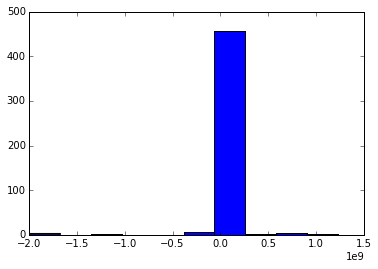

In [38]:
plt.hist(df_grouped4)

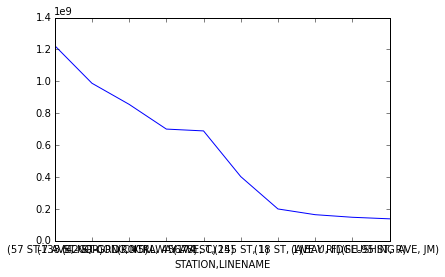

In [39]:
df_grouped4[:10].plot()

<Container object of 473 artists>

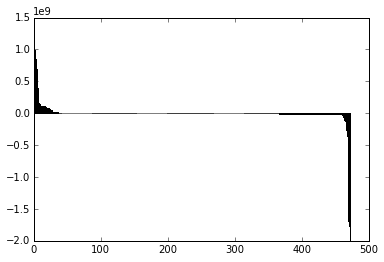

In [40]:
indices = range(len(df_grouped4))
plt.bar(indices,df_grouped4)